

Note untuk EDA:
* tambahkan analisis multivariate
* Tambahkan penjelasan dan hanya gunakan top 5 saja untuk ditampilkan


# Data dictionary

- order_id: object – Unique identifier for each order.
- order_date: object – Date when the order was placed.
- status: object – The status of the order (e.g., "received", "complete").
- item_id: int64 – Unique identifier for each item in the order.
- sku: object – Stock Keeping Unit identifier for the item.
- qty_ordered: int64 – Quantity of the item ordered.
- price: float64 – Price per unit of the item.
- value: float64 – Total value for the quantity ordered (price * qty_ordered).
- discount_amount: float64 – The discount applied on the order.
- total: float64 – Total amount for the order after discount.
- category: object – Product category of the item.
- payment_method: object – Method used for payment (e.g., credit card, PayPal).
- bi_st: object – Business status of the transaction (e.g., Gross, Net, Valid).
- cust_id: int64 – Unique identifier for the customer.
- year: int64 – Year when the order was placed.
- month: object – Month when the order was placed (e.g., "January").
- ref_num: int64 – Reference number for the order.
- Name Prefix: object – Prefix for the customer's name (e.g., Mr., Ms.).
- First Name: object – Customer's first name.
- Middle Initial: object – Customer's middle initial.
- Last Name: object – Customer's last name.
- Gender: object – Customer's gender.
- age: int64 – Customer's age.
- full_name: object – Full name of the customer (first + last).
- E Mail: object – Customer's email address.
- Sign in date: object – Date when the customer signed up.
- Phone No.: object – Customer's phone number.
- Place Name: object – Place name (could refer to a location).
- County: object – County of the customer.
- City: object – City of the customer.
- State: object – State of the customer.
- Zip: int64 – Zip code of the customer.
- Region: object – Region of the customer (e.g., "South").
- User Name: object – Username of the customer.
- Discount_Percent: float64 – Percentage of discount applied on the order.

In [9]:
# import package
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:

data = pd.read_csv('../Dataset/Amazon Sales 20-21.csv')

C:\Users\ADVAN\AppData\Local\Temp\ipykernel_14032\3666590342.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../Dataset/Amazon Sales 20-21.csv')


# Overview data

In [11]:
data.head()

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,category,payment_method,bi_st,cust_id,year,month,ref_num,Name Prefix,First Name,Middle Initial,Last Name,Gender,age,full_name,E Mail,Sign in date,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
0,100354678,01/10/2020,received,574772,oasis_Oasis-064-36,21,89.9,1798.0,0.0,1798.0,Men's Fashion,cod,Valid,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
1,100354678,01/10/2020,received,574774,Fantastic_FT-48,11,19.0,190.0,0.0,190.0,Men's Fashion,cod,Valid,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
2,100354680,01/10/2020,complete,574777,mdeal_DMC-610-8,9,149.9,1199.2,0.0,1199.2,Men's Fashion,cod,Net,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
3,100354680,01/10/2020,complete,574779,oasis_Oasis-061-36,9,79.9,639.2,0.0,639.2,Men's Fashion,cod,Net,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
4,100367357,13/11/2020,received,595185,MEFNAR59C38B6CA08CD,2,99.9,99.9,0.0,99.9,Men's Fashion,cod,Valid,60124,2020,Nov-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0


In [12]:
# Convert order_date column to datetime type
data['order_date'] = pd.to_datetime(data['order_date'], format='%d/%m/%Y')

In [13]:
# Identify numeric and categorical columns
numerical_columns = data.select_dtypes(include=['number']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

In [14]:
# Descriptive statistics for numeric columns
numerical_desc = data[numerical_columns].describe()

# Descriptive statistics for categorical columns
categorical_desc = data[categorical_columns].describe()

In [16]:
numerical_desc

,item_id,qty_ordered,price,value,discount_amount,total,cust_id,year,ref_num,age,Zip,Discount_Percent
count,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000
mean,741664.902131,3.011296,851.385253,885.879934,70.039427,815.840507,70048.019054,2020.618778,560853.663395,46.489033,49723.160015,6.069079
std,95746.031827,4.573837,1741.750751,2073.252179,256.880870,1983.580302,30243.856395,0.485688,255828.418398,16.673288,27597.198873,10.100100
min,574769.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2020.000000,111127.000000,18.000000,210.000000,0.000000
25%,659684.500000,2.000000,49.900000,49.900000,0.000000,49.900000,56519.000000,2020.000000,341265.000000,32.000000,26571.750000,0.000000
50%,742309.000000,2.000000,119.000000,158.970000,0.000000,149.800000,74225.500000,2021.000000,564857.000000,47.000000,49316.000000,0.000000
75%,826124.250000,3.000000,950.000000,910.000000,18.383050,800.000000,92357.000000,2021.000000,781086.000000,61.000000,72645.000000,11.000000
max,905208.000000,501.000000,101262.590000,101262.590000,30213.150000,101262.590000,115326.000000,2021.000000,999981.000000,75.000000,99950.000000,75.000000


In [17]:
categorical_desc

,order_id,status,sku,category,payment_method,bi_st,month,Name Prefix,First Name,Middle Initial,Last Name,Gender,full_name,E Mail,Sign in date,Phone No.,Place Name,County,City,State,Region,User Name
count,286392,286392,286392,286392,286392,286392,286392,286392,286392,286392,286392,286392,286392,286392,286392,286392,286392,286392,286392,286392,286392,286392
unique,201716,13,47932,15,13,3,12,7,5161,26,18208,2,64212,64246,11647,64248,15892,2551,15892,51,4,64006
top,100476608,canceled,MATSAM59DB75ADB2F80,Mobiles & Tablets,cod,Gross,Dec-20,Mr.,Joel,U,Gonzalez,M,"Gonzalez, Joel",joel.gonzalez@yahoo.com,11/30/2005,217-861-7640,Dekalb,Jefferson,Dekalb,TX,South,jugonzalez
freq,43,112166,3775,61761,102916,112333,82528,103506,2895,13135,2543,146184,2524,2524,2536,2524,2525,3510,2525,17510,103482,2524


In [18]:
# Calculating the total purchase per customer
total_per_customer = data.groupby('cust_id')['total'].sum().reset_index()
total_per_customer = total_per_customer.rename(columns={'total': 'total_per_customer'})

# Merge total_per_customer into the main dataframe
data = pd.merge(data, total_per_customer, on='cust_id', how='left')

In [19]:
# Added time column since last purchase
last_purchase = data.groupby('cust_id')['order_date'].max().reset_index()
last_purchase = pd.to_datetime('today') - last_purchase['order_date']
data['days_since_last_purchase'] = last_purchase.dt.days

# EDA

## Descriptive Analysis

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 37 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  286392 non-null  object        
 1   order_date                286392 non-null  datetime64[ns]
 2   status                    286392 non-null  object        
 3   item_id                   286392 non-null  int64         
 4   sku                       286392 non-null  object        
 5   qty_ordered               286392 non-null  int64         
 6   price                     286392 non-null  float64       
 7   value                     286392 non-null  float64       
 8   discount_amount           286392 non-null  float64       
 9   total                     286392 non-null  float64       
 10  category                  286392 non-null  object        
 11  payment_method            286392 non-null  object        
 12  bi

In [21]:
data.describe()

,order_date,item_id,qty_ordered,price,value,discount_amount,total,cust_id,year,ref_num,age,Zip,Discount_Percent,total_per_customer,days_since_last_purchase
count,286392,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,2.863920e+05,64248.000000
mean,2021-03-12 11:18:32.008715264,741664.902131,3.011296,851.385253,885.879934,70.039427,815.840507,70048.019054,2020.618778,560853.663395,46.489033,49723.160015,6.069079,2.677723e+04,1384.310438
min,2020-10-01 00:00:00,574769.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2020.000000,111127.000000,18.000000,210.000000,0.000000,0.000000e+00,1191.000000
25%,2020-12-24 00:00:00,659684.500000,2.000000,49.900000,49.900000,0.000000,49.900000,56519.000000,2020.000000,341265.000000,32.000000,26571.750000,0.000000,6.000000e+02,1324.000000
50%,2021-03-16 00:00:00,742309.000000,2.000000,119.000000,158.970000,0.000000,149.800000,74225.500000,2021.000000,564857.000000,47.000000,49316.000000,0.000000,3.501995e+03,1378.000000
75%,2021-05-18 00:00:00,826124.250000,3.000000,950.000000,910.000000,18.383050,800.000000,92357.000000,2021.000000,781086.000000,61.000000,72645.000000,11.000000,1.510457e+04,1468.000000
max,2021-09-30 00:00:00,905208.000000,501.000000,101262.590000,101262.590000,30213.150000,101262.590000,115326.000000,2021.000000,999981.000000,75.000000,99950.000000,75.000000,1.900290e+06,1555.000000
std,NaN,95746.031827,4.573837,1741.750751,2073.252179,256.880870,1983.580302,30243.856395,0.485688,255828.418398,16.673288,27597.198873,10.100100,1.059086e+05,90.074338


In [22]:
data['status'].value_counts()


status
canceled          112166
complete           88968
received           51775
order_refunded     25713
refund              3820
cod                 2851
paid                 756
closed               176
payment_review        57
pending               48
processing            33
holded                25
pending_paypal         4
Name: count, dtype: int64

In [23]:
data['category'].value_counts()

category
Mobiles & Tablets     61761
Men's Fashion         40713
Appliances            33034
Women's Fashion       28334
Others                26108
Beauty & Grooming     17899
Entertainment         17352
Superstore            15024
Home & Living         13990
Health & Sports        8421
Computing              8110
Soghaat                7250
Kids & Baby            6492
School & Education     1090
Books                   814
Name: count, dtype: int64

In [24]:
data['payment_method'].value_counts()

payment_method
cod                  102916
Easypay               69679
Payaxis               31049
easypay_voucher       29763
bankalfalah           23057
Easypay_MA            11536
jazzwallet             6669
jazzvoucher            6045
customercredit         3702
apg                    1758
mcblite                 208
cashatdoorstep            9
financesettlement         1
Name: count, dtype: int64

In [25]:
data['Gender'].value_counts()

Gender
M    146184
F    140208
Name: count, dtype: int64

In [26]:
data['County'].value_counts()

County
Jefferson        3510
Los Angeles      3198
DeKalb           3098
Washington       2863
Montgomery       2563
                 ... 
Bloom City          1
Cinda               1
Lisbon Center       1
Clintonville        1
Burnwell            1
Name: count, Length: 2551, dtype: int64

In [27]:
data['City'].value_counts()

City
Dekalb           2525
Washington       2008
New York City    1391
Houston          1250
El Paso          1019
                 ... 
Corunna             1
Dolores             1
Tokeland            1
Willington          1
Valera              1
Name: count, Length: 15892, dtype: int64

In [28]:
data['State'].value_counts()

State
TX    17510
CA    17130
NY    15567
PA    14394
IL    12628
FL    10538
OH    10204
MO     8876
VA     8557
IA     8170
MN     8020
NC     7549
KY     7397
MI     7137
IN     6738
WV     6447
GA     6346
WI     5529
OK     5253
AL     5252
CO     5036
MA     5001
NJ     4984
TN     4981
KS     4879
AR     4864
LA     4709
MD     4163
WA     4155
NE     3775
SC     3771
AZ     3712
MS     3565
OR     3179
MT     3122
CT     3037
SD     2993
NM     2987
ME     2857
UT     2650
AK     2509
VT     2504
ND     2350
ID     2348
DC     1865
WY     1727
NV     1725
NH     1695
HI      800
DE      715
RI      492
Name: count, dtype: int64

In [ ]:
data['Region'].value_counts()

,count
Region,
South,103482
Midwest,81299
West,51080
Northeast,50531


In [30]:
data['bi_st'].value_counts()

bi_st
Gross    112333
Net       89144
Valid     84915
Name: count, dtype: int64

## Sales Performance Analysis.

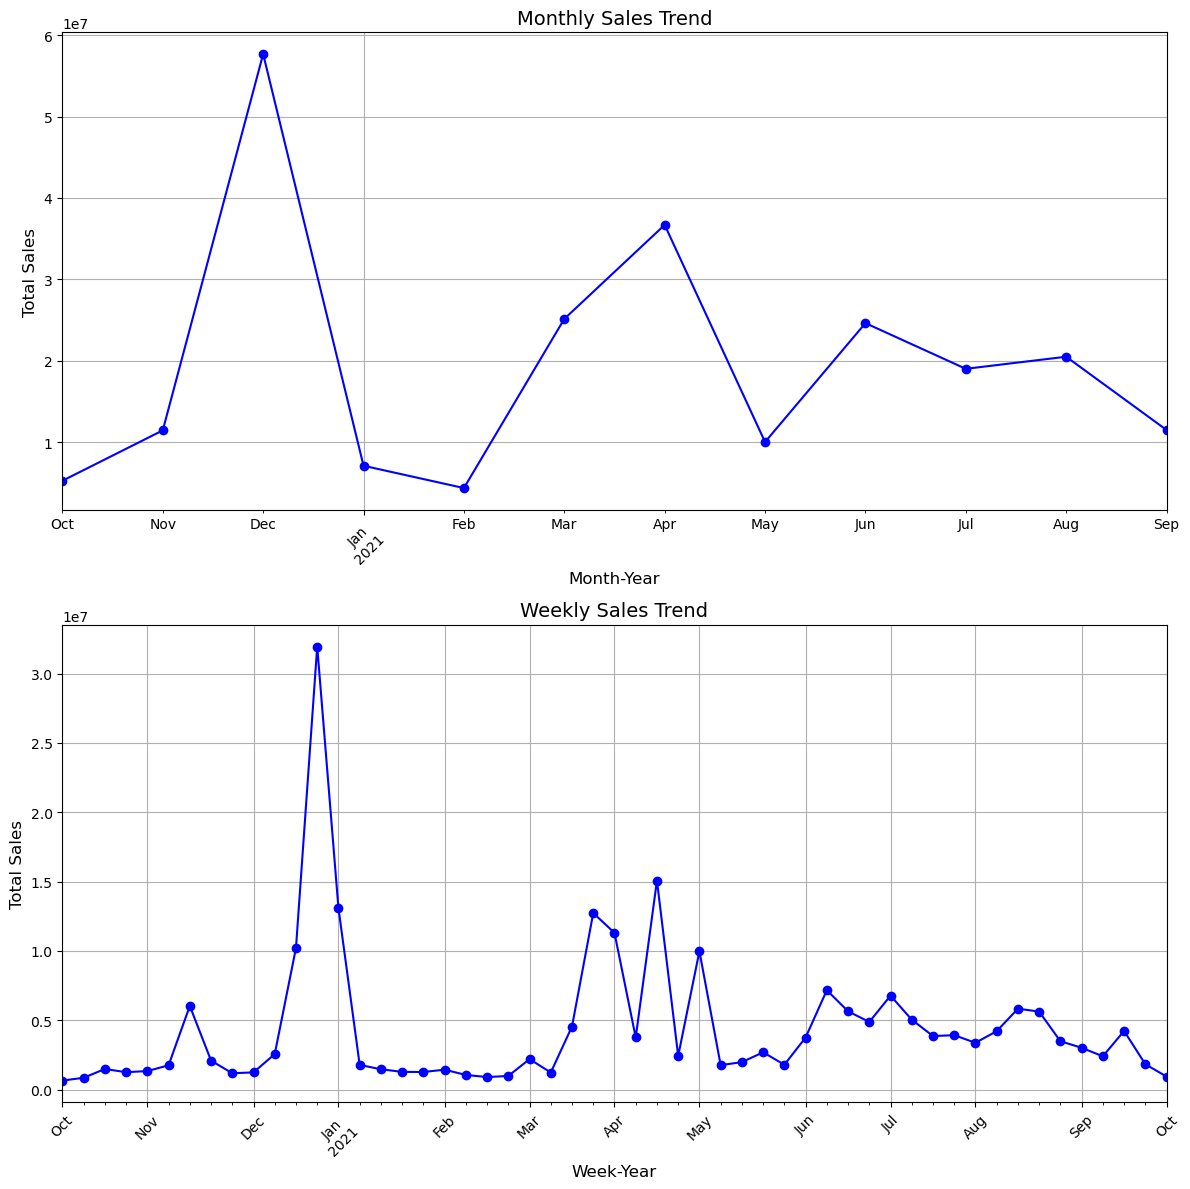

In [31]:
# Extract Year-Month and Year-Week for resampling
data['Year-Month'] = data['order_date'].dt.to_period('M')
data['Year-Week'] = data['order_date'].dt.to_period('W')

# Group by Year-Month and calculate total sales
monthly_sales = data.groupby('Year-Month')['total'].sum()

# Group by Year-Week and calculate total sales
weekly_sales = data.groupby('Year-Week')['total'].sum()

# Plotting both monthly and weekly sales trends
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))  # Create two vertically stacked subplots

# Plot monthly sales trend
monthly_sales.plot(ax=ax1, kind='line', marker='o', color='blue')
ax1.set_title('Monthly Sales Trend', fontsize=14)  # Set the title for the monthly trend
ax1.set_xlabel('Month-Year', fontsize=12)  # Label for the x-axis
ax1.set_ylabel('Total Sales', fontsize=12)  # Label for the y-axis
ax1.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
ax1.grid(True)  # Add grid lines to the plot

# Plot weekly sales trend
weekly_sales.plot(ax=ax2, kind='line', marker='o', color='blue')
ax2.set_title('Weekly Sales Trend', fontsize=14)  # Set the title for the weekly trend
ax2.set_xlabel('Week-Year', fontsize=12)  # Label for the x-axis
ax2.set_ylabel('Total Sales', fontsize=12)  # Label for the y-axis
ax2.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
ax2.grid(True)  # Add grid lines to the plot

# Adjust the layout to ensure plots do not overlap
plt.tight_layout()
plt.show()

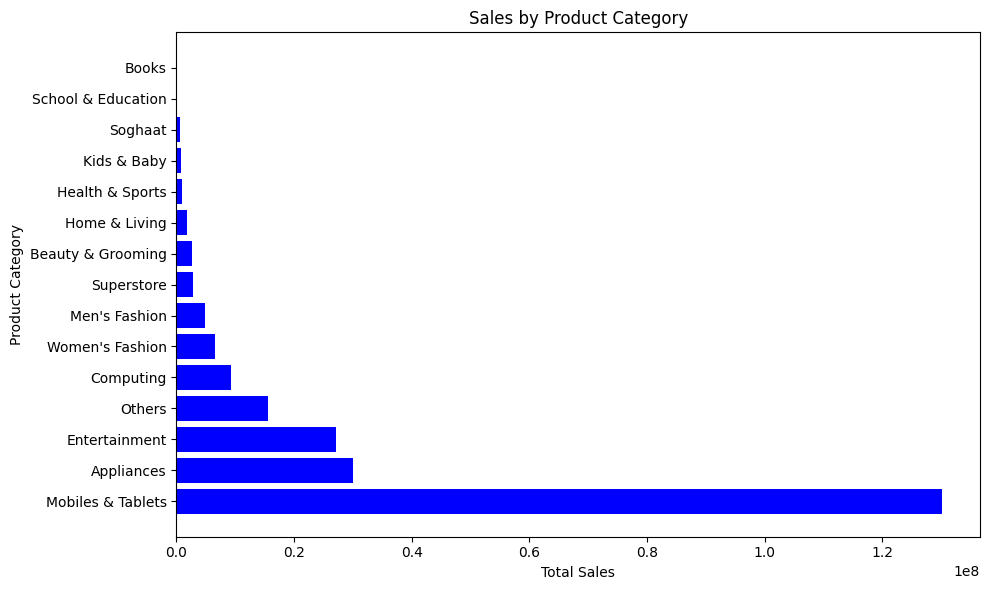

In [ ]:
# Group by Product Category and calculate total sales
category_sales = data.groupby('category')['total'].sum().reset_index()

# Sort the categories by sales in descending order
category_sales_sorted = category_sales.sort_values(by='total', ascending=False)

# Plot sales by product category
plt.figure(figsize=(10,6))
plt.barh(category_sales_sorted['category'], category_sales_sorted['total'], color='b')
plt.title('Sales by Product Category')
plt.xlabel('Total Sales')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

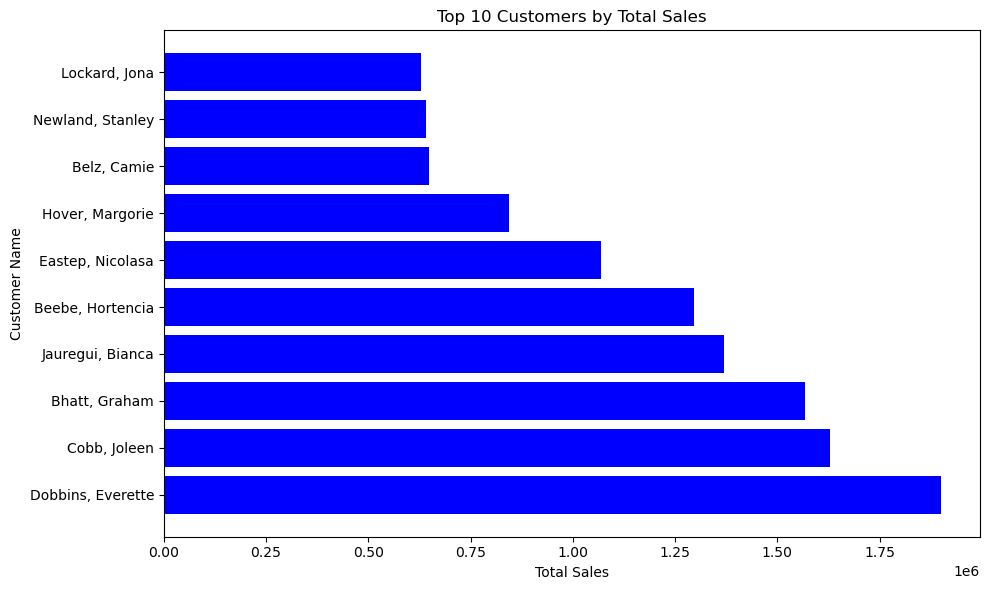

In [32]:
# Group by Customer Name and calculate total sales
customer_sales = data.groupby('full_name')['total'].sum().reset_index()

# Sort customers by total sales in descending order
customer_sales_sorted = customer_sales.sort_values(by='total', ascending=False)

# Plot sales by customer
plt.figure(figsize=(10,6))
plt.barh(customer_sales_sorted['full_name'].head(10), customer_sales_sorted['total'].head(10), color='b')
plt.title('Top 10 Customers by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Customer Name')
plt.tight_layout()
plt.show()

## Customer Insights and Segmentation

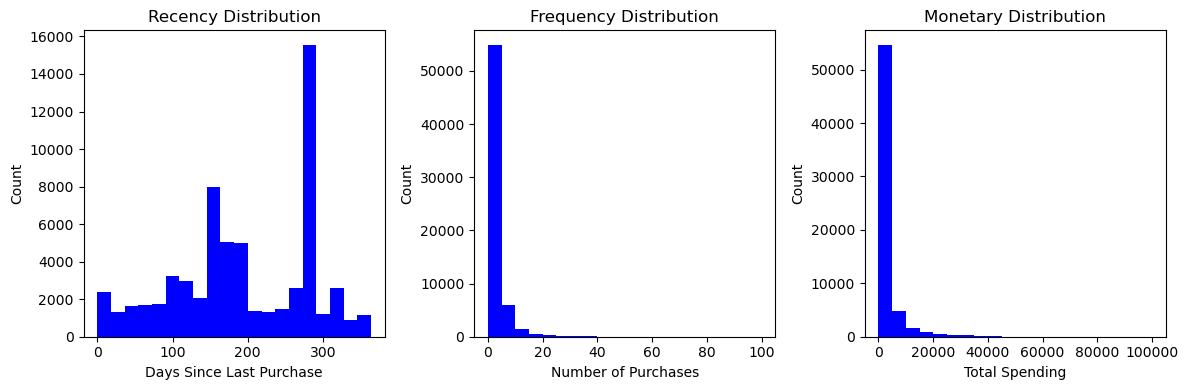

In [35]:
# Set the current date as the last date in the dataset
current_date = data['order_date'].max()

# Aggregate by order_id to ensure unique orders
data_orders = data.groupby('order_id').agg({
    'User Name': 'first',         # Retain customer name
    'order_date': 'first',        # Retain order date
    'total': 'sum'                # Sum total spending for the order
}).reset_index()

# Calculate RFM metrics by grouping by User Name
rfm = data_orders.groupby('User Name').agg({
    'order_date': lambda x: (current_date - x.max()).days,  # Recency: Days since last order
    'order_id': 'count',                                   # Frequency: Number of unique orders
    'total': 'sum'                                         # Monetary: Total spending across all orders
}).reset_index()

# Rename columns for better understanding
rfm.rename(columns={'order_date': 'Recency', 'order_id': 'Frequency', 'total': 'Monetary'}, inplace=True)

# Step 3: Remove outliers in Monetary (Top 1%)
monetary_threshold = rfm['Monetary'].quantile(0.99)
rfm_filtered = rfm[rfm['Monetary'] <= monetary_threshold]

# Plot RFM distributions
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(rfm_filtered['Recency'], bins=20, color='blue')
plt.title('Recency Distribution')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(rfm_filtered['Frequency'], bins=range(0, 101, 5), color='blue')
plt.title('Frequency Distribution')
plt.xlabel('Number of Purchases')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(rfm_filtered['Monetary'], bins=20, range=(0, 100000), color='blue')
plt.title('Monetary Distribution')
plt.xlabel('Total Spending')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

C:\Users\ADVAN\AppData\Local\Temp\ipykernel_14032\292635347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_filtered['AOV'] = rfm_filtered['Monetary'] / rfm_filtered['Frequency']


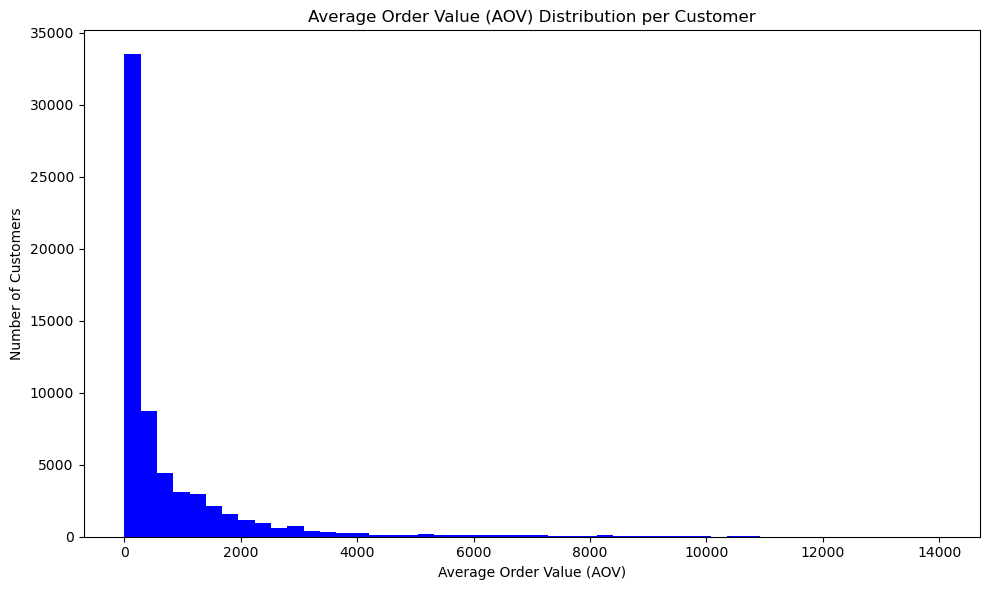

In [48]:
# Calculate Average Order Value (AOV) per customer
rfm_filtered['AOV'] = rfm_filtered['Monetary'] / rfm_filtered['Frequency']

# Plot the distribution of Average Order Value
plt.figure(figsize=(10, 6))
plt.hist(rfm_filtered['AOV'], bins=50, range=(0, 14000), color='blue')
plt.title('Average Order Value (AOV) Distribution per Customer')
plt.xlabel('Average Order Value (AOV)')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()


<ipython-input-55-7608921a7a93>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_filtered['Spending_Segment'] = pd.cut(rfm_filtered['Monetary'],


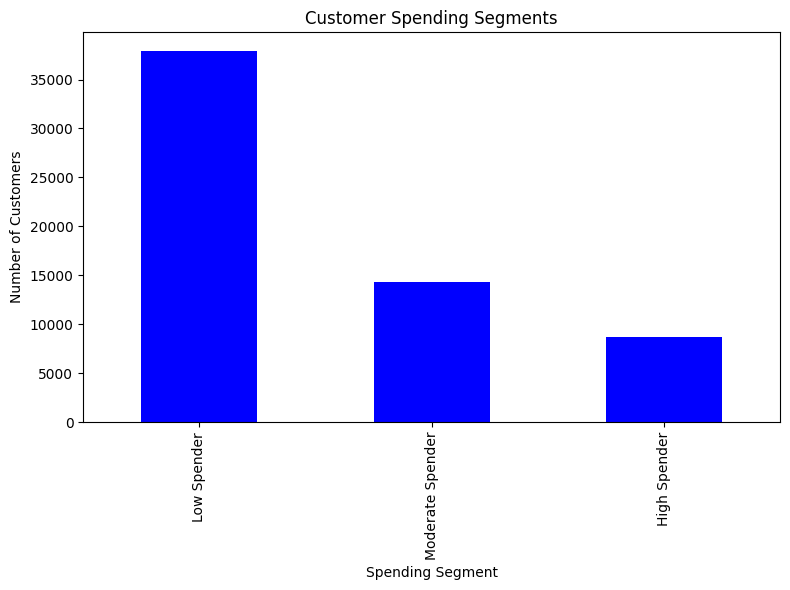

In [ ]:
# Define spending categories (Low, Medium, High)
rfm_filtered['Spending_Segment'] = pd.cut(rfm_filtered['Monetary'],
                                          bins=[0, 1000, 5000, rfm_filtered['Monetary'].max()],
                                          labels=['Low Spender', 'Moderate Spender', 'High Spender'])

# Count customers in each segment
spending_segment_count = rfm_filtered['Spending_Segment'].value_counts()

# Plot spending segment distribution
plt.figure(figsize=(8, 6))
spending_segment_count.plot(kind='bar', color='blue')
plt.title('Customer Spending Segments')
plt.xlabel('Spending Segment')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

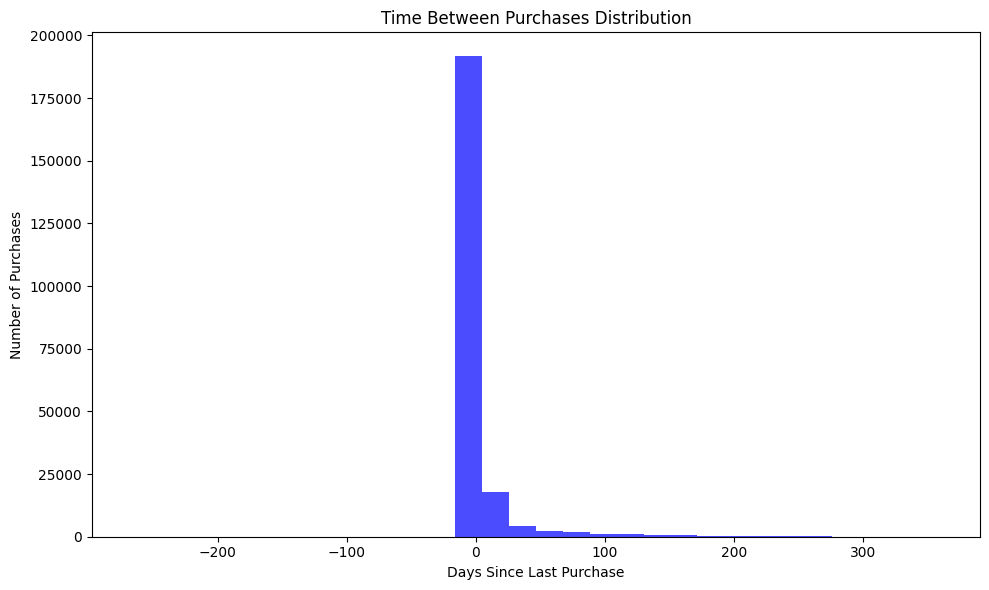

In [ ]:
# Calculate time difference between each customer's purchases
data['prev_purchase'] = data.groupby('User Name')['order_date'].shift(1)
data['days_since_last_purchase'] = (data['order_date'] - data['prev_purchase']).dt.days

# Plot distribution of time between purchases
plt.figure(figsize=(10, 6))
plt.hist(data['days_since_last_purchase'].dropna(), bins=30, color='blue', alpha=0.7)
plt.title('Time Between Purchases Distribution')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Purchases')
plt.tight_layout()
plt.show()


       payment_method   total_spent    avg_spent  total_orders
0             Easypay  5.466165e+07   784.478086         50955
4         bankalfalah  4.785926e+07  2075.693083         16906
8     easypay_voucher  4.205570e+07  1413.019595         26436
2             Payaxis  3.802795e+07  1224.772076         23880
6                 cod  3.277232e+07   318.437588         61086
1          Easypay_MA  6.712672e+06   581.889076          8475
10        jazzvoucher  5.542017e+06   916.793595          5177
11         jazzwallet  2.508311e+06   376.115049          5029
7      customercredit  1.963930e+06   530.505245          2318
3                 apg  1.373653e+06   781.372731          1239
12            mcblite  1.668736e+05   802.276923           208
5      cashatdoorstep  3.799200e+03   422.133333             6
9   financesettlement  2.059900e+03  2059.900000             1


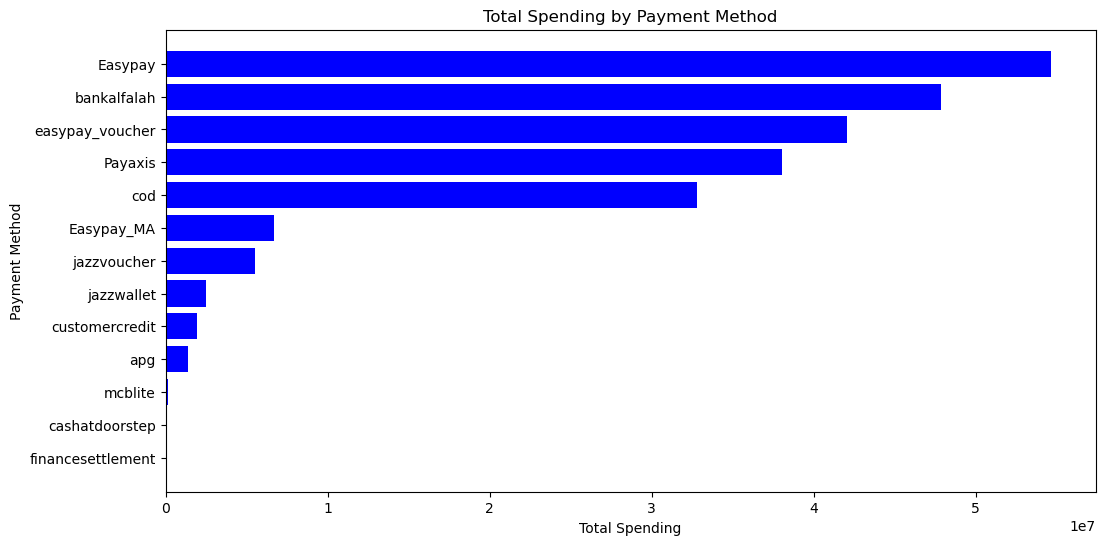

In [50]:
# Analyze payment method preferences
payment_preferences = data.groupby('payment_method').agg(
    total_spent=('total', 'sum'),
    avg_spent=('total', 'mean'),
    total_orders=('order_id', 'nunique')
).reset_index().sort_values(by='total_spent', ascending=False)

# Display the payment method preferences
print(payment_preferences)

# Visualize the payment method preferences
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.barh(payment_preferences['payment_method'], payment_preferences['total_spent'], color='blue')
plt.title('Total Spending by Payment Method')
plt.xlabel('Total Spending')
plt.ylabel('Payment Method')
plt.gca().invert_yaxis()  # Invert Y-axis for better readability
plt.show()


              category   total_sales    avg_sales  num_orders
9    Mobiles & Tablets  1.301120e+08  2106.701539       58834
0           Appliances  3.006084e+07   909.996839       29901
4        Entertainment  2.713843e+07  1563.994630       16919
10              Others  1.556433e+07   596.151921       25054
3            Computing  9.362343e+06  1154.419647        7532
14     Women's Fashion  6.649842e+06   234.694770       17310
8        Men's Fashion  4.820147e+06   118.393304       27627
13          Superstore  2.886907e+06   192.152996        8469
1    Beauty & Grooming  2.644748e+06   147.759516       11313
6        Home & Living  1.810582e+06   129.419751        8353
5      Health & Sports  1.019958e+06   121.120719        5148
7          Kids & Baby  8.562133e+05   131.887442        4068
12             Soghaat  5.766999e+05    79.544820        4071
11  School & Education  1.147401e+05   105.266163         715
2                Books  3.241695e+04    39.824266         708


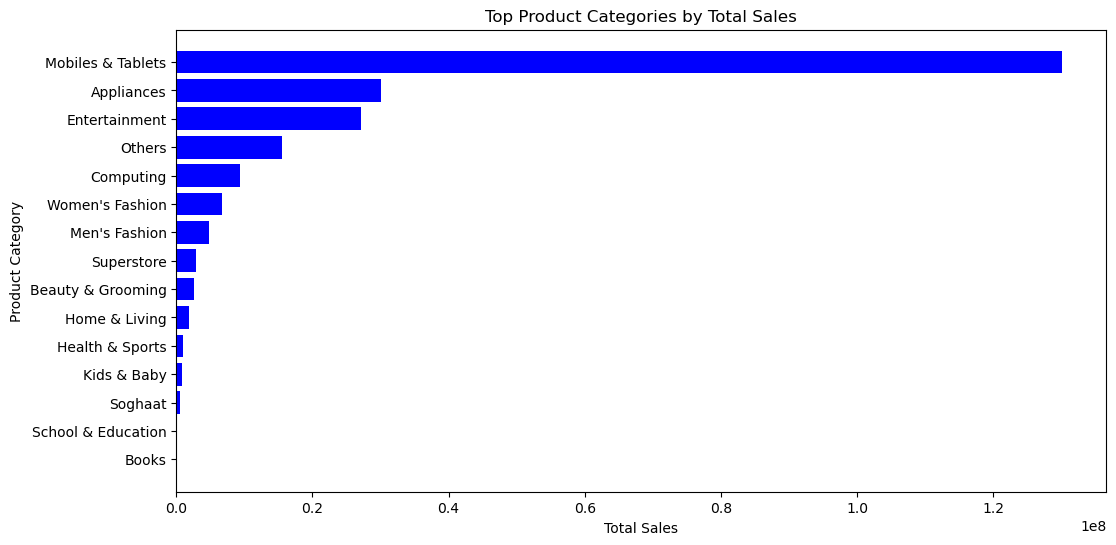

In [49]:
# Analyze product preferences by grouping total sales by category
product_preferences = data.groupby('category').agg(
    total_sales=('total', 'sum'),
    avg_sales=('total', 'mean'),
    num_orders=('order_id', 'nunique')
).reset_index()

# Sort by total sales to identify the most popular categories
product_preferences = product_preferences.sort_values(by='total_sales', ascending=False)

# Display the product preferences summary
print(product_preferences)

# Visualize the top product categories by total sales
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.barh(product_preferences['category'], product_preferences['total_sales'], color='blue')
plt.title('Top Product Categories by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Category')
plt.gca().invert_yaxis()  # Invert Y-axis for better readability
plt.show()


## Discount and Pricing Strategy

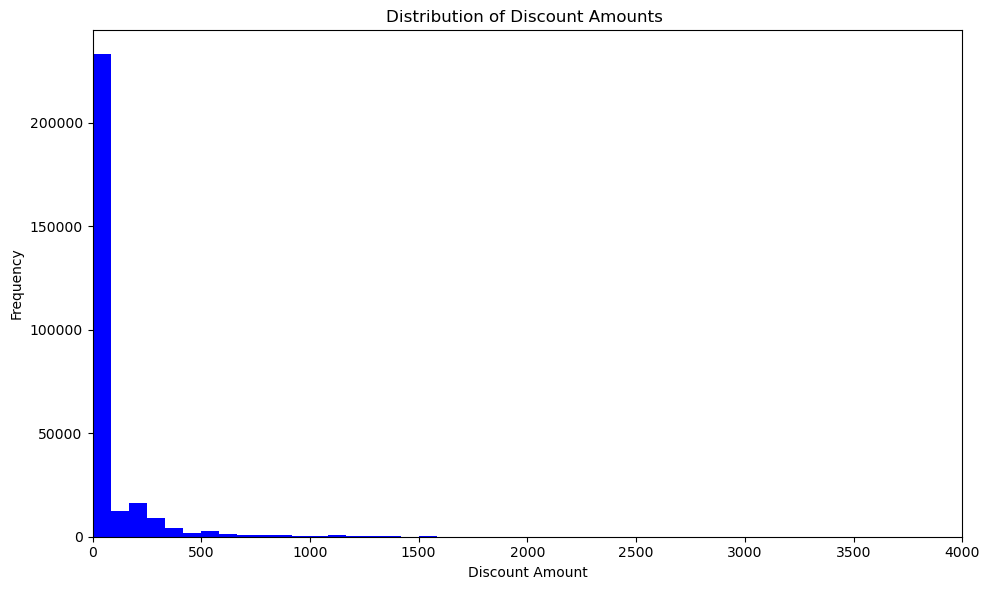

In [54]:
# Plot distribution of discount amounts
plt.figure(figsize=(10, 6))
plt.hist(data['discount_amount'], bins=30, range=(0, 2500), color='blue')
plt.title('Distribution of Discount Amounts ')
plt.xlabel('Discount Amount')
plt.ylabel('Frequency')
plt.xlim(0, 4000)  # Adjust range to zoom in on lower discount values
plt.tight_layout()
plt.show()


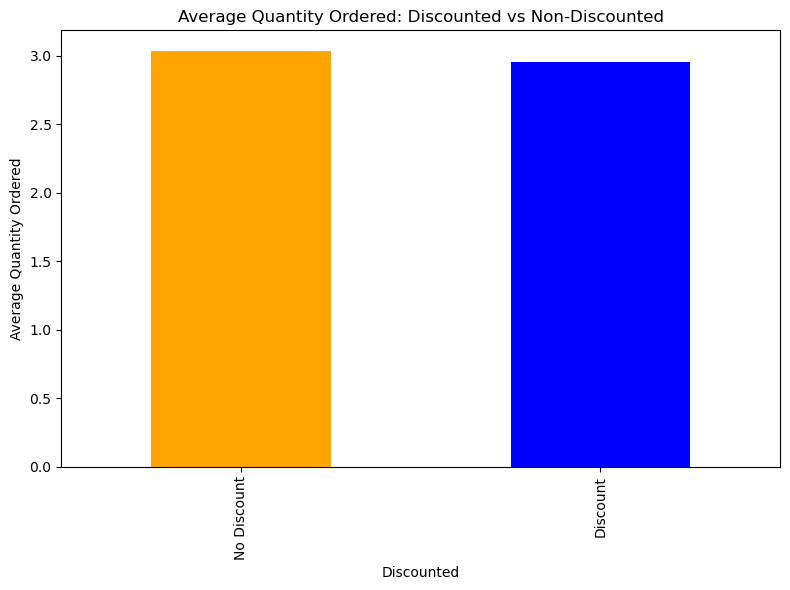

In [55]:
# Categorize products into discounted and non-discounted
data['is_discounted'] = data['discount_amount'] > 0

# Compare average quantity ordered for discounted vs non-discounted products
discounted_sales = data.groupby('is_discounted')['qty_ordered'].mean()

# Plot the comparison
plt.figure(figsize=(8, 6))
discounted_sales.plot(kind='bar', color=['orange', 'blue'])
plt.title('Average Quantity Ordered: Discounted vs Non-Discounted')
plt.xlabel('Discounted')
plt.ylabel('Average Quantity Ordered')
plt.xticks(ticks=[0, 1], labels=['No Discount', 'Discount'])
plt.tight_layout()
plt.show()


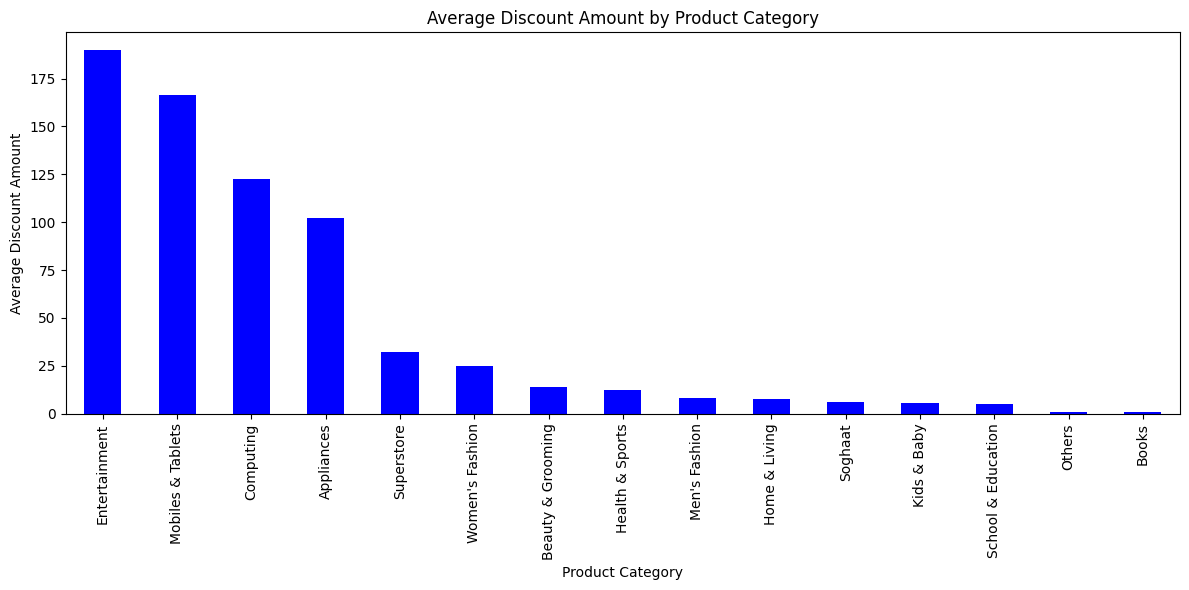

In [ ]:
# Calculate average discount amount by product category
category_discounts = data.groupby('category')['discount_amount'].mean().sort_values(ascending=False)

# Plot average discount by category
plt.figure(figsize=(12, 6))
category_discounts.plot(kind='bar', color='blue')
plt.title('Average Discount Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Discount Amount')
plt.tight_layout()
plt.show()


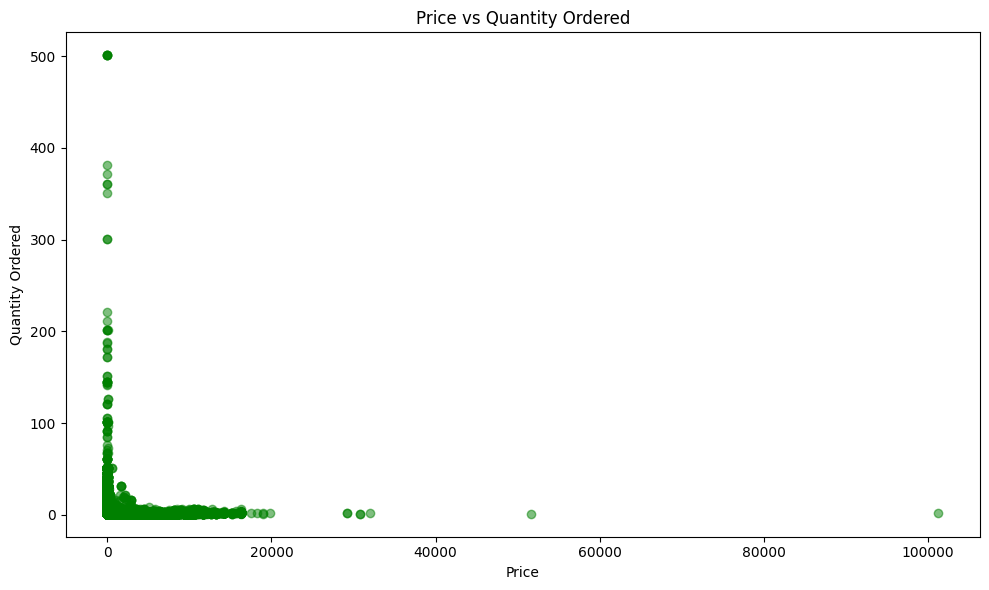

In [ ]:
# Scatter plot of price vs quantity ordered
plt.figure(figsize=(10, 6))
plt.scatter(data['price'], data['qty_ordered'], alpha=0.5, color='green')
plt.title('Price vs Quantity Ordered')
plt.xlabel('Price')
plt.ylabel('Quantity Ordered')
plt.tight_layout()
plt.show()

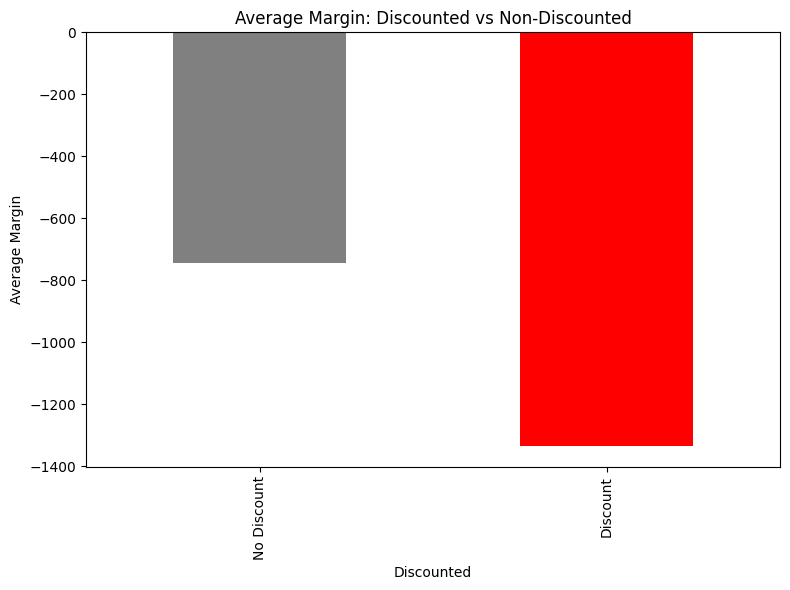

In [ ]:
# Calculate profit margin
data['margin'] = data['total'] - (data['price'] * data['qty_ordered'])

# Compare average margin for discounted vs non-discounted products
margin_comparison = data.groupby('is_discounted')['margin'].mean()

# Plot the comparison
plt.figure(figsize=(8, 6))
margin_comparison.plot(kind='bar', color=['gray', 'red'])
plt.title('Average Margin: Discounted vs Non-Discounted')
plt.xlabel('Discounted')
plt.ylabel('Average Margin')
plt.xticks(ticks=[0, 1], labels=['No Discount', 'Discount'])
plt.tight_layout()
plt.show()


<ipython-input-81-5a5de647df80>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_revenue = data.groupby('discount_category')['total'].sum()


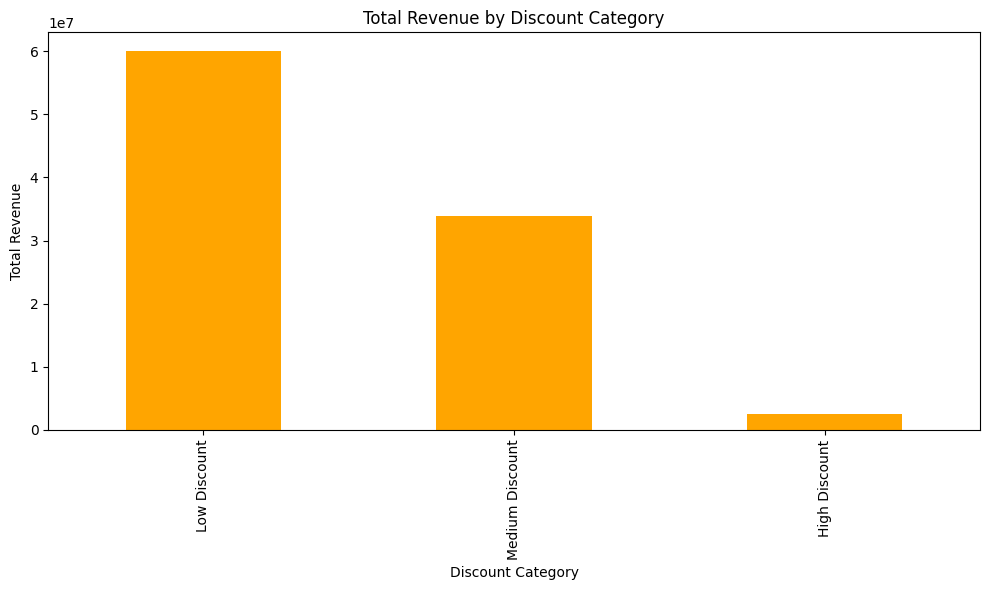

In [ ]:
# Categorize discount amounts into groups (Low, Medium, High)
data['discount_category'] = pd.cut(data['discount_amount'],
                                 bins=[0, 500, 2000, data['discount_amount'].max()],
                                 labels=['Low Discount', 'Medium Discount', 'High Discount'])

# Calculate total revenue for each discount category
discount_revenue = data.groupby('discount_category')['total'].sum()

# Plot total revenue by discount category
plt.figure(figsize=(10, 6))
discount_revenue.plot(kind='bar', color='orange')
plt.title('Total Revenue by Discount Category')
plt.xlabel('Discount Category')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()


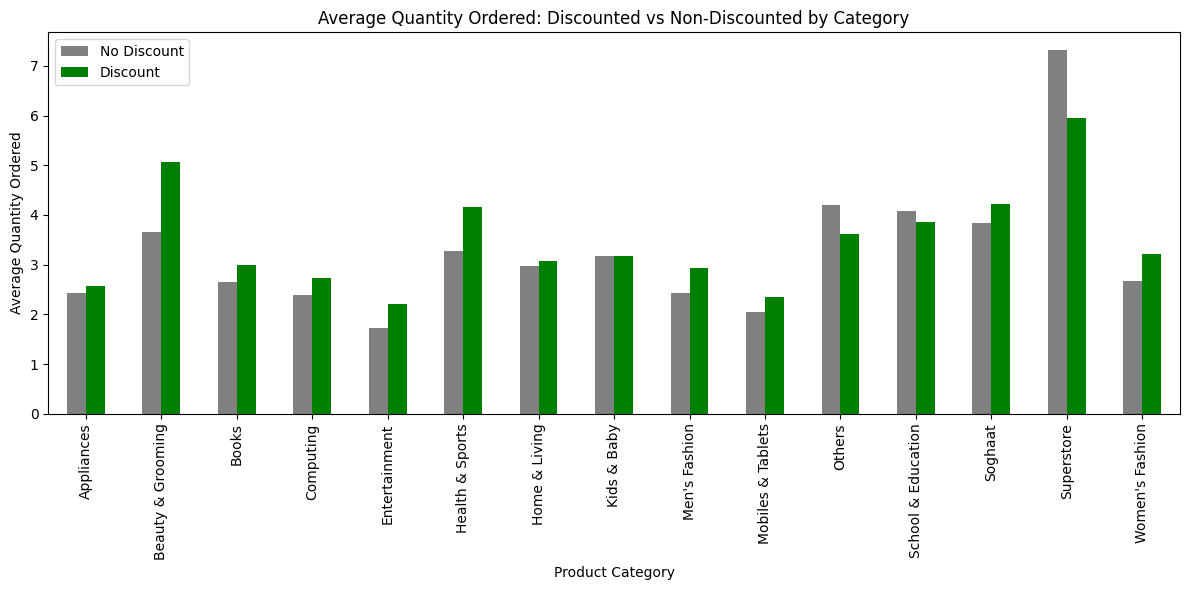

In [ ]:
# Calculate average quantity ordered for discounted vs non-discounted products by category
category_discount_effect = data.groupby(['category', 'is_discounted'])['qty_ordered'].mean().unstack()

# Plot comparison of average quantity ordered for discounted vs non-discounted by category
category_discount_effect.plot(kind='bar', figsize=(12, 6), color=['gray', 'green'])
plt.title('Average Quantity Ordered: Discounted vs Non-Discounted by Category')
plt.xlabel('Product Category')
plt.ylabel('Average Quantity Ordered')
plt.legend(['No Discount', 'Discount'])
plt.tight_layout()
plt.show()


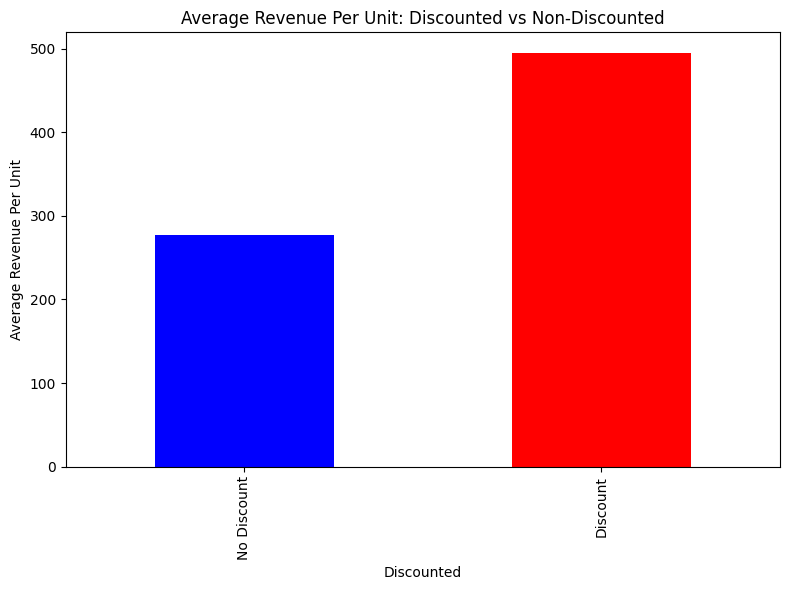

In [ ]:
# Calculate revenue per unit
data['revenue_per_unit'] = data['total'] / data['qty_ordered']

# Compare average revenue per unit for discounted vs non-discounted products
revenue_per_unit_comparison = data.groupby('is_discounted')['revenue_per_unit'].mean()

# Plot comparison
plt.figure(figsize=(8, 6))
revenue_per_unit_comparison.plot(kind='bar', color=['blue', 'red'])
plt.title('Average Revenue Per Unit: Discounted vs Non-Discounted')
plt.xlabel('Discounted')
plt.ylabel('Average Revenue Per Unit')
plt.xticks(ticks=[0, 1], labels=['No Discount', 'Discount'])
plt.tight_layout()
plt.show()


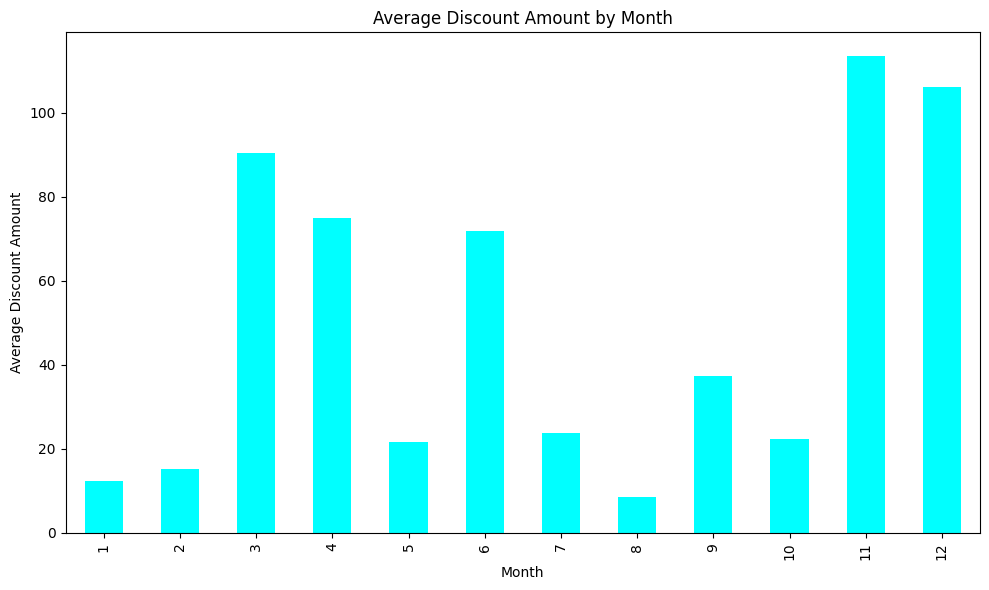

In [ ]:
# Extract month from order_date
data['month'] = data['order_date'].dt.month

# Calculate average discount by month
monthly_discounts = data.groupby('month')['discount_amount'].mean()

# Plot average discount by month
plt.figure(figsize=(10, 6))
monthly_discounts.plot(kind='bar', color='cyan')
plt.title('Average Discount Amount by Month')
plt.xlabel('Month')
plt.ylabel('Average Discount Amount')
plt.tight_layout()
plt.show()


## Multivariate Analysis

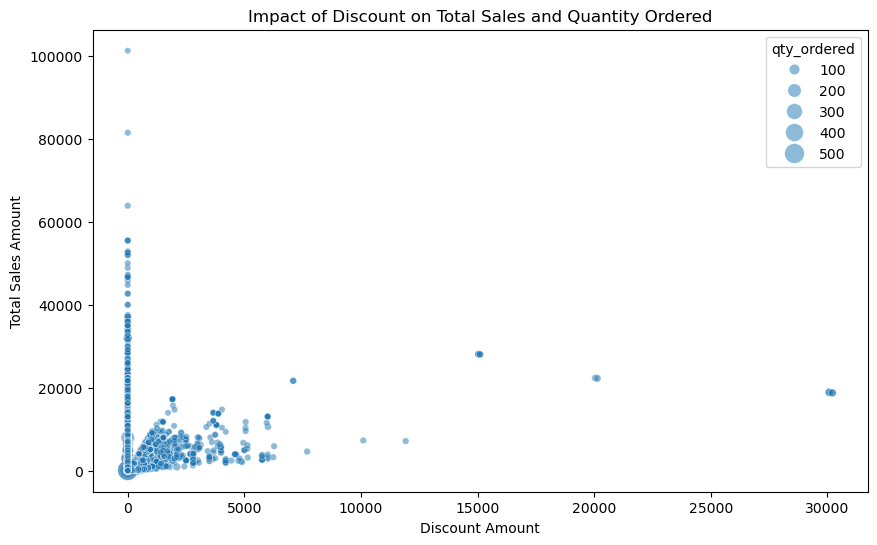

In [56]:
# 1. Analysis of Discount Impact on Total Sales and Quantity Ordered
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='discount_amount', y='total', size='qty_ordered', sizes=(20, 200), alpha=0.5)
plt.title('Impact of Discount on Total Sales and Quantity Ordered')
plt.xlabel('Discount Amount')
plt.ylabel('Total Sales Amount')
plt.show()

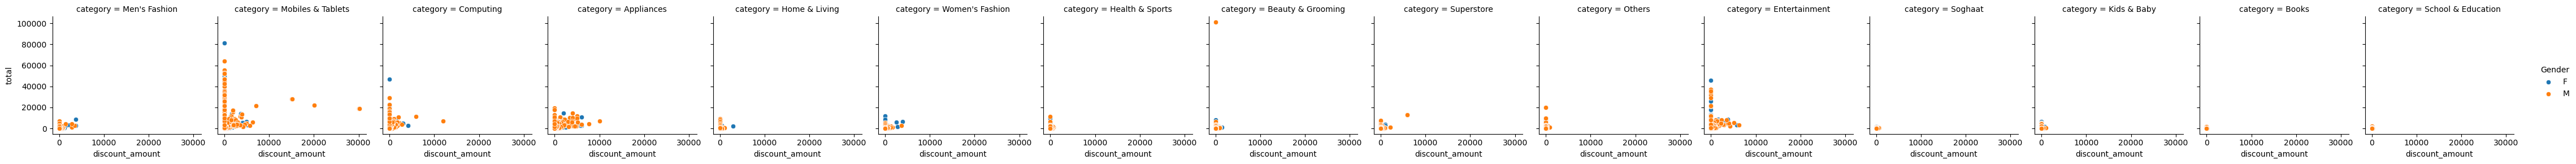

In [61]:
g = sns.FacetGrid(data, col='category', hue='Gender')  # Ganti 'category' dan 'Gender' sesuai kebutuhan
g.map(sns.scatterplot, 'discount_amount', 'total')
g.add_legend()
plt.show()


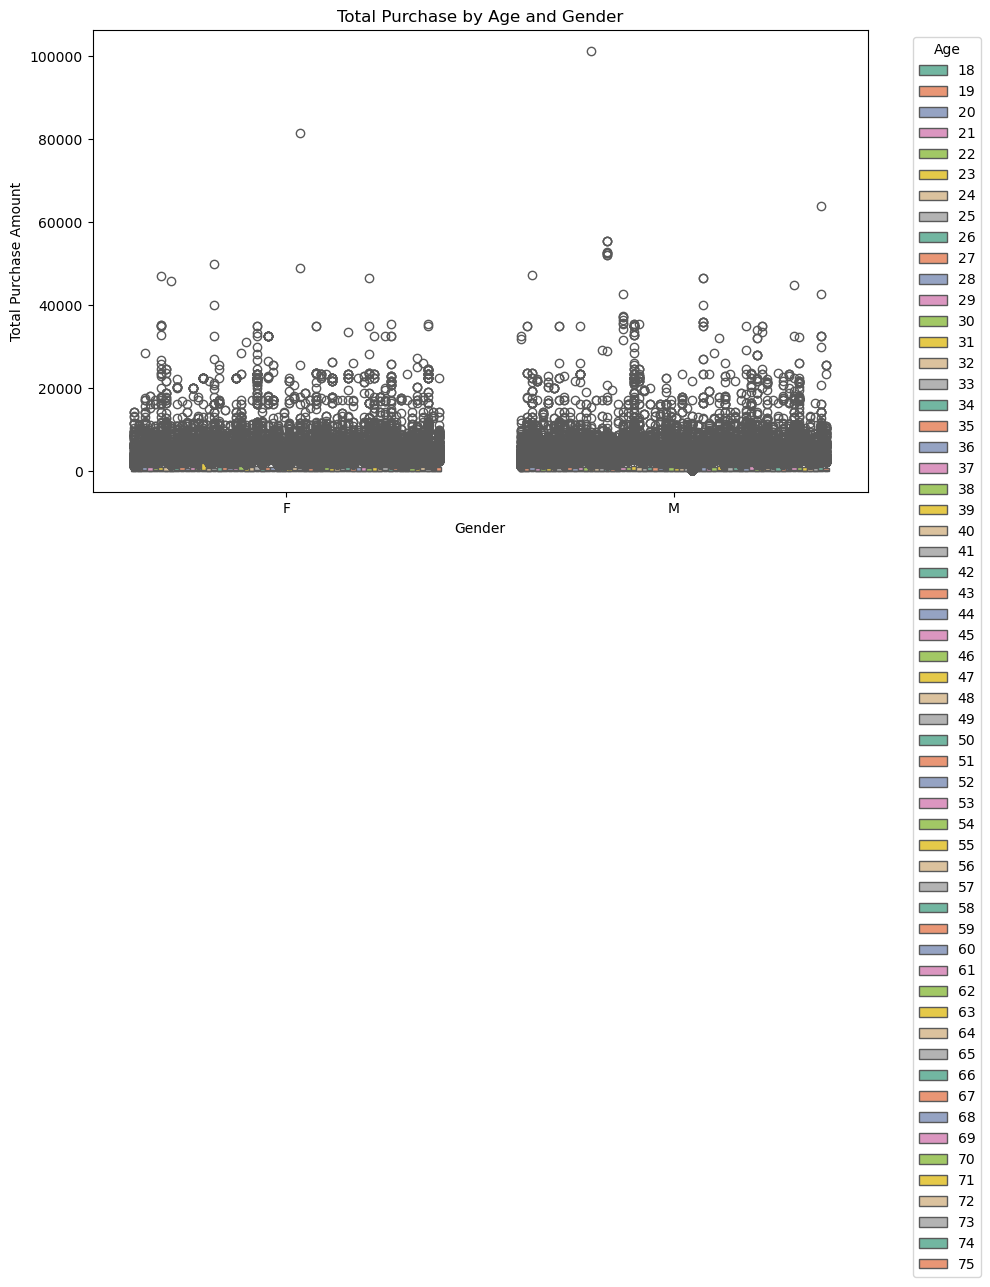

In [57]:
# 2. Age, Gender, and Total Purchase Relationship
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Gender', y='total', hue='age', palette='Set2')
plt.title('Total Purchase by Age and Gender')
plt.xlabel('Gender')
plt.ylabel('Total Purchase Amount')
plt.legend(title='Age', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


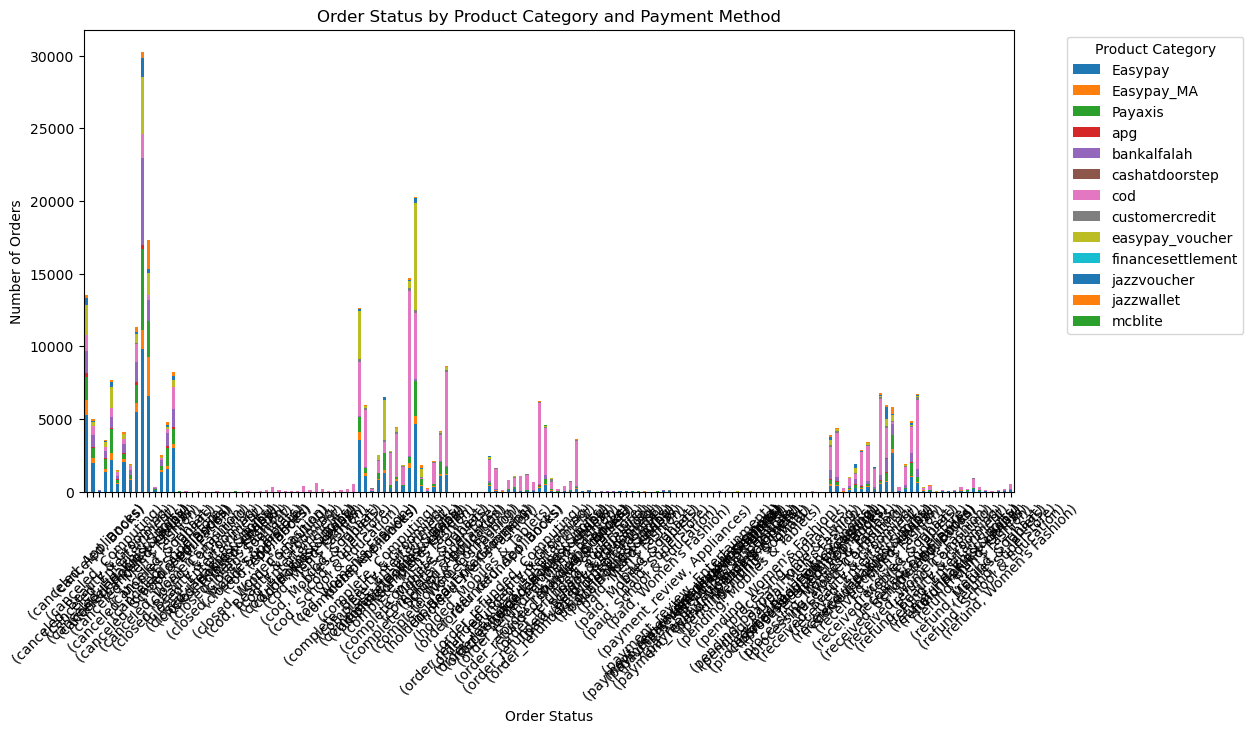

In [58]:
# 3. Order Status by Product Category and Payment Method
status_category_payment = data.groupby(['status', 'category', 'payment_method']).size().unstack(fill_value=0)
status_category_payment.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Order Status by Product Category and Payment Method')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

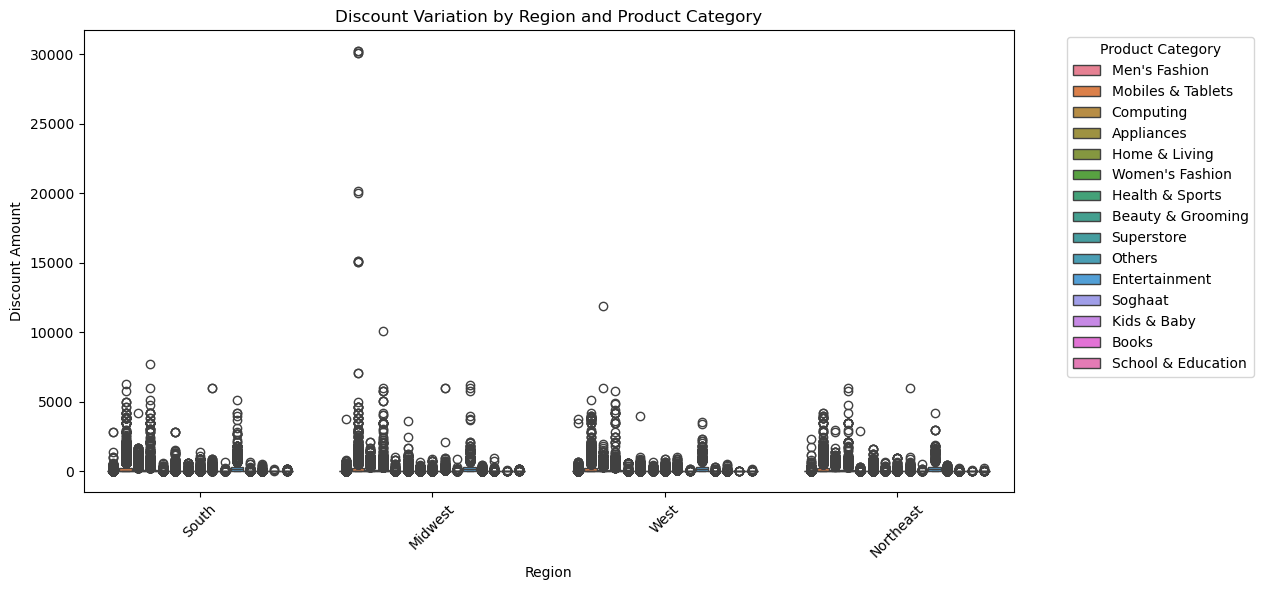

In [59]:
# 4. Discount Variation by Region and Product Category
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Region', y='discount_amount', hue='category')
plt.title('Discount Variation by Region and Product Category')
plt.xlabel('Region')
plt.ylabel('Discount Amount')
plt.xticks(rotation=45)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

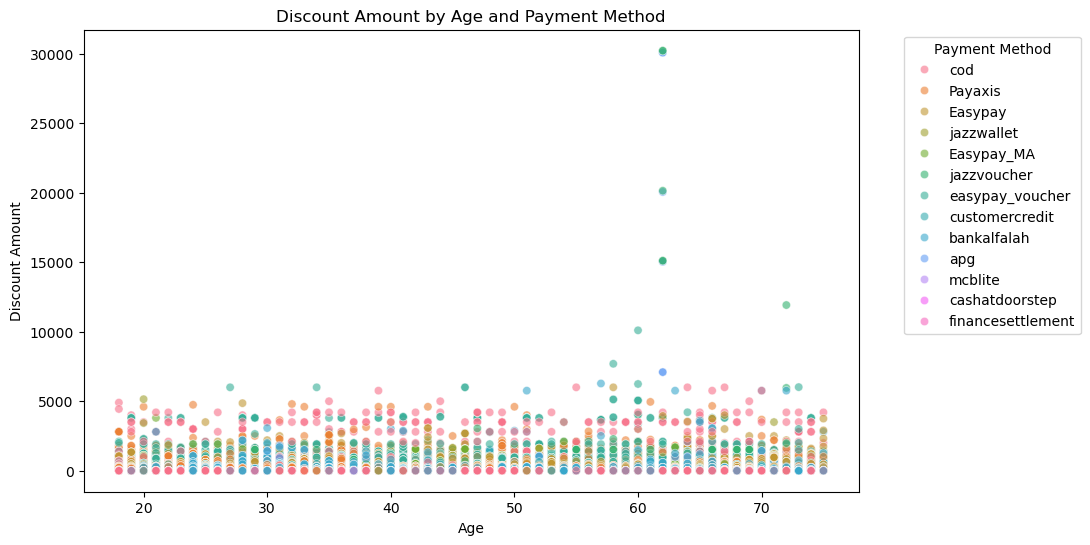

In [60]:
# 5. Age, Discount, and Payment Method Relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='discount_amount', hue='payment_method', alpha=0.6)
plt.title('Discount Amount by Age and Payment Method')
plt.xlabel('Age')
plt.ylabel('Discount Amount')
plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Visualization of Relationship Between Features

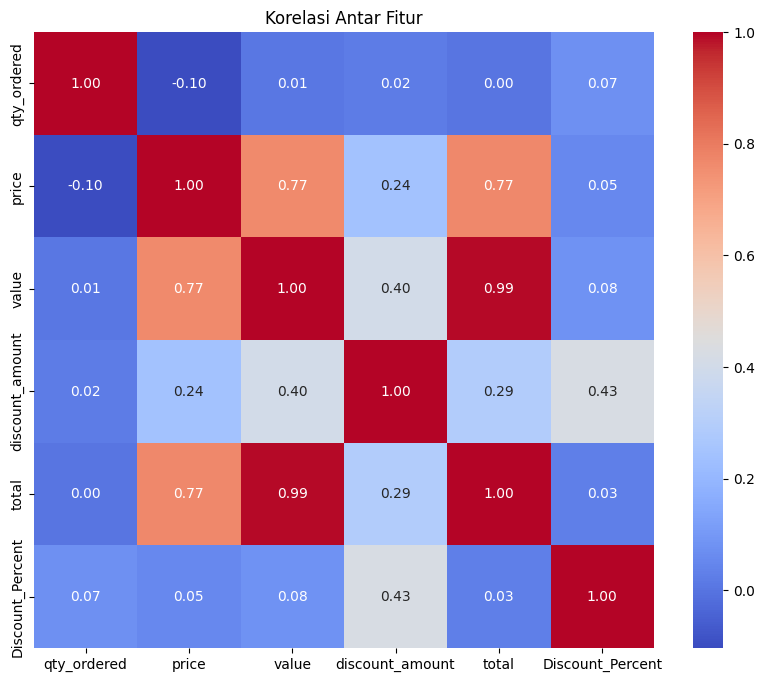

In [ ]:
data_corr = data[['qty_ordered', 'price', 'value', 'discount_amount', 'total', 'Discount_Percent']]

correlation_matrix = data_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Korelasi Antar Fitur")
plt.show()
